In [ ]:
import os
import pandas as pd 

In [ ]:
%pwd #I uploaded the initial dataset (raw reddit data) into /content. The working directory should default to /content. 

'/content'

The line below should work for all three of us (pulls the data from a public git repo)

In [ ]:
df = pd.read_csv('https://github.com/chrissoria/Disability_Reddit/raw/6a23a9c0d28f185676788f68e04394555542dc4e/Data/disability_30000_submissions.csv')

Below we remove all entries in the dataset where there is no "selftext"

In [ ]:
df = df.loc[~df['selftext'].isin(['[removed]', '[deleted]' ]),:]
df = df.dropna(subset=['selftext']).reset_index()
df.index

RangeIndex(start=0, stop=14928, step=1)

The dataset goes from 30,339 to 14,928 after deleting all removed and deleted selftext inputs and Null values. A dramatic reduction.

In [ ]:
df.head()

,index,Unnamed: 0,id,created_utc,link_flair_text,author_flair_text,author,over_18,title,is_self,selftext,score,upvote_ratio,distinguished,num_comments
0,0,0,p8hcfj,1629505393,NaN,NaN,OrdanCoal,False,Anybody noticed the trap people set with your ...,True,"Like, if I'm crying because I'm in chronic pai...",34,0.92,NaN,53
1,1,1,p84kgg,1629463903,Rant,NaN,dusnood_,False,"Feeling guilty for spending with ""disability i...",True,I don’t have any regular bills as I still live...,32,0.94,NaN,65
2,3,3,p82mfs,1629455803,Discussion,NaN,ShenandoahValley,False,Only 30% of SSD applicants approved on first try,True,This came from a manager at the local SSA offi...,14,0.90,NaN,81
3,4,4,p8cdd2,1629488445,NaN,NaN,musicalearnightingal,False,Have you ever called someone out for treating ...,True,So one of my coworkers really hates me. I get ...,12,0.93,NaN,20
4,5,5,p8w0cl,1629568461,Rant,NaN,OracNimsaj,False,What's the most ridiculous (or infuriating) th...,True,context: I (24F) have an unknown form of Muscu...,11,0.92,NaN,179


In [ ]:
disability.selftext.iloc[25]

"Posting for someone else. I know someone who has applied for disability for bipolar disorder and chronic migraine. So they have a mental status exam today and a physical exam at the same place in two weeks. There are of course many overlapping symptoms. \n\n The question I am most concerned about is if they admit to using marijuana to treat migraines (it mostly just makes the pain bearable and sometimes helps with nausea, it doesn't actually make the migraine stop), will they be denied because supposedly this could exacerbate bipolar symptoms? Medical marijuana just became legal in this state, but they do not yet have a medical card. Will they be drug tested if they omit the weed?"

In [ ]:
disability.selftext.iloc[1182]

"Posting for someone else. I know someone who has applied for disability for bipolar disorder and chronic migraine. So they have a mental status exam today and a physical exam at the same place in two weeks. There are of course many overlapping symptoms. \n\n The question I am most concerned about is if they admit to using marijuana to treat migraines (it mostly just makes the pain bearable and sometimes helps with nausea, it doesn't actually make the migraine stop), will they be denied because supposedly this could exacerbate bipolar symptoms? Medical marijuana just became legal in this state, but they do not yet have a medical card. Will they be drug tested if they omit the weed?"

In [ ]:
import spacy
# Load the English preprocessing pipeline
nlp = spacy.load('en_core_web_sm')

# Parse the first reddit post in the dataset
parsed_post = nlp(df.selftext[0])
print(parsed_post)

Like, if I'm crying because I'm in chronic pain, it's because I'm "too weak to be happy"

If I'm happy and smile, it means I couldn't possibly be in pain

The fucked up thing is, I can definitely be in pain and still be happy, but if I have to meet one more nasty person that I thought I would like, but turns out they're horrible Ableist, I might vomit. 

The people that know me know me as the person that is legitimately in pain **and** is still smiling, but then these people that I would have vouched for as neighbors, friends, and otherwise the kind of people you'd genuinely want to meet, suddenly turned out to be complete bigots. 

It's like coming to find out a dear member of your family is, like, **dangerously** racist, or that your Uncle doesn't see women as people. 

I think one of the worst things being disabled and, for some of us, debatably, perhaps *the* worst thing, is the faith you lose not just in life, but in humanity. 

Like, I was okay with being on a tiny spinning rock 

The below breaks down parsed posts into sentences

In [ ]:
for idx, sentence in enumerate(parsed_post.sents):
    print(f'Sentence {idx + 1}')
    print(sentence)
    print('')

Sentence 1
Like, if I'm crying because I'm in chronic pain, it's because I'm "too weak to be happy"

If I'm happy and smile, it means I couldn't possibly be in pain



Sentence 2
The fucked up thing is, I can definitely be in pain and still be happy, but if I have to meet one more nasty person that I thought I would like, but turns out they're horrible Ableist, I might vomit.

Sentence 3




Sentence 4
The people that know me know me as the person that is legitimately in pain **and** is still smiling, but then these people that I would have vouched for as neighbors, friends, and otherwise the kind of people you'd genuinely want to meet, suddenly turned out to be complete bigots.

Sentence 5




Sentence 6
It's like coming to find out a dear member of your family is, like, **dangerously** racist, or that your Uncle doesn't see women as people.

Sentence 7




Sentence 8
I think one of the worst things being disabled and, for some of us, debatably, perhaps *the* worst thing, is the faith

The below is a test on the first 15 posts to see if it's correctly identifying 

1.   List item
2.   List item

lemmas. It looks like it's working well. 

In [ ]:
# Extract the first 15 items for the following properties of the parsed post

# The token text 
token_text = [token.orth_ for token in parsed_post][:15]   
# Part of speech 
token_pos = [token.pos_ for token in parsed_post][:15]   
# Lemma (or 'dictionary form')
token_lemma = [token.lemma_ for token in parsed_post][:15]
# Stop word? t/f
token_stop = [token.is_stop for token in parsed_post][:15]
# Puncutation? t/f
token_punct = [token.is_punct for token in parsed_post][:15]

# Make a dataframe with these items
pd.DataFrame(zip(token_text, token_pos, token_lemma, token_stop, token_punct),
             columns=['token_text', 'part_of_speech', 'token_lemma', 'token_stop', 'token_punct'])

,token_text,part_of_speech,token_lemma,token_stop,token_punct
0,Like,INTJ,like,False,False
1,",",PUNCT,",",False,True
2,if,SCONJ,if,True,False
3,I,PRON,I,True,False
4,'m,AUX,be,True,False
5,crying,VERB,cry,False,False
6,because,SCONJ,because,True,False
7,I,PRON,I,True,False
8,'m,AUX,be,True,False
9,in,ADP,in,True,False


Now we run code to try and identify all lemmes in the entire dataset (selecting only for nouns and adjetives and removing everything else).

In [ ]:
def clean(token):
    """Helper function that specifies whether a token is:
        - punctuation
        - space
        - digit
    """
    return token.is_punct or token.is_space or token.is_digit

def line_read(df, text_col='selftext'):
    """Generator function to read in text from df and get rid of line breaks."""    
    for text in df[text_col]:
        yield text.replace('\n', '')

def preprocess(df, text_col='selftext', allowed_postags=['NOUN', 'ADJ']):
    """Preprocessing function to apply to a dataframe."""
    for parsed in nlp.pipe(line_read(df, text_col), batch_size=1000, disable=["tok2vec", "ner"]):
        # Gather lowercased, lemmatized tokens
        tokens = [token.lemma_.lower() if token.lemma_ != '-PRON-'
                  else token.lower_ 
                  for token in parsed if not clean(token)]
        # Remove specific lemmatizations, and words that are not nouns or adjectives
        tokens = [lemma
                  for lemma in tokens
                  if not lemma in ["'s",  "’s", "’"] and not lemma in allowed_postags]
        # Remove stop words
        tokens = [token for token in tokens if token not in spacy.lang.en.stop_words.STOP_WORDS]
        yield tokens

In [ ]:
%who

clean	 df	 idx	 line_read	 nlp	 os	 parsed_post	 pd	 preprocess	 
sentence	 spacy	 token_lemma	 token_pos	 token_punct	 token_stop	 token_text	 


In [ ]:
lemmas = [line for line in preprocess(df)]

Printing out the lemmas from the first post

In [ ]:
lemmas[0]

['like',
 'crying',
 'chronic',
 'pain',
 'weak',
 'happy"if',
 'happy',
 'smile',
 'means',
 'possibly',
 'painthe',
 'fucked',
 'thing',
 'definitely',
 'pain',
 'happy',
 'meet',
 'nasty',
 'person',
 'thought',
 'like',
 'turns',
 'horrible',
 'ableist',
 'vomit',
 'people',
 'know',
 'know',
 'person',
 'legitimately',
 'pain',
 'smiling',
 'people',
 'vouched',
 'neighbors',
 'friends',
 'kind',
 'people',
 'genuinely',
 'want',
 'meet',
 'suddenly',
 'turned',
 'complete',
 'bigots',
 'like',
 'coming',
 'find',
 'dear',
 'member',
 'family',
 'like',
 'dangerously',
 'racist',
 'uncle',
 'women',
 'people',
 'think',
 'worst',
 'things',
 'disabled',
 'debatably',
 'worst',
 'thing',
 'faith',
 'lose',
 'life',
 'humanity',
 'like',
 'okay',
 'tiny',
 'spinning',
 'rock',
 'edge',
 'centerless',
 'void',
 'realize',
 'little',
 'company',
 'fellows',
 'care',
 'mean',
 "that's",
 'worse',
 'definitely',
 'worse']

checking to see if the lemmas are lining up with posts. Looks good.

In [ ]:
parsed_post_test = nlp(df.selftext[10])
print(parsed_post_test)
lemmas[10]

Title, basically? An attorney advised me to find services/products that help me perform my part-time job, and that I’d be able to deduct their cost from my earnings for the process of determining eligibility.

I’ll examine my own life to see what I might be able to cite, but I’m at a loss and would love to hear examples of what other people have cited!


['title',
 'basically',
 'attorney',
 'advised',
 'find',
 'services',
 'products',
 'help',
 'perform',
 'time',
 'job',
 'able',
 'deduct',
 'cost',
 'earnings',
 'process',
 'determining',
 'eligibility',
 'i’ll',
 'examine',
 'life',
 'able',
 'cite',
 'loss',
 'love',
 'hear',
 'examples',
 'people',
 'cited']

Next, we want to identify bigrams and trigrams

In [ ]:
from gensim.models.phrases import Phrases, Phraser

bigram = Phrases(lemmas, min_count=10, threshold=100)
trigram = Phrases(bigram[lemmas], min_count=10, threshold=50)  
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# Form trigrams
trigrams = [trigram_phraser[bigram_phraser[doc]] for doc in lemmas]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
trigrams_joined = [' '.join(trigram) for trigram in trigrams] #trigrams
trigrams_joined[0] #printing out the trigrams in post 1

'like crying chronic_pain weak happy"if happy smile means possibly painthe fucked thing definitely pain happy meet nasty person thought like turns horrible ableist vomit people know know person legitimately pain smiling people vouched neighbors friends kind people genuinely want meet suddenly turned complete bigots like coming find dear member family like dangerously racist uncle women people think worst things disabled debatably worst thing faith lose life humanity like okay tiny spinning rock edge centerless void realize little company fellows care mean that\'s worse definitely worse'

In [ ]:
trigram_phraser["That", "was", "not", "a", "big", "deal"]

['That', 'was', 'not', 'a', 'big', 'deal']

How many trigrams are there in our dataset?

In [ ]:
len(bigram_phraser.phrasegrams.keys())

423

In [ ]:
list(bigram_phraser.phrasegrams.keys())[:10]

[(b'thanks', b'advance'),
 (b'muscular', b'dystrophy'),
 (b'official', b'diagnosis'),
 (b'onset', b'date'),
 (b'bachelor', b'degree'),
 (b'wheelchair', b'user'),
 (b'muscle', b'weakness'),
 (b'l4', b'l5'),
 (b'spinal', b'cord'),
 (b'handicap', b'parking')]

In [ ]:
[trigram for trigram in list(trigram_phraser.phrasegrams.keys()) if trigram.count('_') == 2]

[]

In [ ]:
# Inserting next to selftext column
df.insert(loc=7, column='lemmas', value=trigrams_joined)
# Removing empty rows in lemmas
df = df[~df['lemmas'].isin([''])]

In [ ]:
 df.head(3)

,index,Unnamed: 0,id,created_utc,link_flair_text,author_flair_text,author,lemmas,over_18,title,is_self,selftext,score,upvote_ratio,distinguished,num_comments
0,0,0,p8hcfj,1629505393,NaN,NaN,OrdanCoal,"like crying chronic_pain weak happy""if happy s...",False,Anybody noticed the trap people set with your ...,True,"Like, if I'm crying because I'm in chronic pai...",34,0.92,NaN,53
1,1,1,p84kgg,1629463903,Rant,NaN,dusnood_,regular bills live relatives pay small things ...,False,"Feeling guilty for spending with ""disability i...",True,I don’t have any regular bills as I still live...,32,0.94,NaN,65
2,3,3,p82mfs,1629455803,Discussion,NaN,ShenandoahValley,came manager local ssa office va spoke started...,False,Only 30% of SSD applicants approved on first try,True,This came from a manager at the local SSA offi...,14,0.90,NaN,81


In [ ]:
df.to_csv('disability_sub_top_sm_lemmas.csv', index=False)

In [ ]:
df.shape

(14920, 16)

**Question for the team: why does the save file contain 30,300 entries instead of 14,920 like we see here?**

In [ ]:
df.shape

(14920, 16)

In [ ]:
df = pd.read_csv('disability_sub_top_sm_lemmas.csv')

In [ ]:
df.head()

,index,Unnamed: 0,id,created_utc,link_flair_text,author_flair_text,author,lemmas,over_18,title,is_self,selftext,score,upvote_ratio,distinguished,num_comments
0,0,0,p8hcfj,1629505393,NaN,NaN,OrdanCoal,"like crying chronic_pain weak happy""if happy s...",False,Anybody noticed the trap people set with your ...,True,"Like, if I'm crying because I'm in chronic pai...",34,0.92,NaN,53
1,1,1,p84kgg,1629463903,Rant,NaN,dusnood_,regular bills live relatives pay small things ...,False,"Feeling guilty for spending with ""disability i...",True,I don’t have any regular bills as I still live...,32,0.94,NaN,65
2,3,3,p82mfs,1629455803,Discussion,NaN,ShenandoahValley,came manager local ssa office va spoke started...,False,Only 30% of SSD applicants approved on first try,True,This came from a manager at the local SSA offi...,14,0.90,NaN,81
3,4,4,p8cdd2,1629488445,NaN,NaN,musicalearnightingal,coworkers hates workplaces politics having hat...,False,Have you ever called someone out for treating ...,True,So one of my coworkers really hates me. I get ...,12,0.93,NaN,20
4,5,5,p8w0cl,1629568461,Rant,NaN,OracNimsaj,context 24f unknown form muscular_dystrophy wa...,False,What's the most ridiculous (or infuriating) th...,True,context: I (24F) have an unknown form of Muscu...,11,0.92,NaN,179


Sampling the top 3 posts. We have relatively low posts compared to "Am I The Asshole"

In [ ]:
df.sort_values(by=['score'], ascending=False)[:3]

,index,Unnamed: 0,id,created_utc,link_flair_text,author_flair_text,author,lemmas,over_18,title,is_self,selftext,score,upvote_ratio,distinguished,num_comments
9486,18284,18284,btda50,1558904951,NaN,NaN,onegalnamedsal,meet new people thing spend seconds wondering ...,False,Just because my life is on hardcore mode doesn...,True,"When I meet new people, quite often the first ...",232,NaN,NaN,25
9390,18089,18089,bfq7v6,1555862031,NaN,NaN,Disabledsnarker,bullshit employers accommodate smokers disable...,False,Employers are more flexible for chain smokers ...,True,It's bullshit that employers accommodate smoke...,142,NaN,NaN,14
11275,22079,22079,8htanx,1525746822,Rant,NaN,knockoffpainting,referred disabled corrected saying differently...,False,An able-bodied person corrected the term I use...,True,"I referred to myself as “disabled”, and she co...",135,NaN,NaN,65


Creating a new dataframe with only those posts that received more than 5 upvotes (we can change this later if we want for your own purposes or for our group project)

In [ ]:
df_top = df.loc[df['score'] >= 5, :]
len(df_top)

3691

A count/list of what types of posts there are in the reddit. My personal project will probably focus in on "rants," but your project or our group project might choose to focus in on something else.

In [ ]:
df.link_flair_text.value_counts() #I might want to focus in on the Rant flair

Question             4633
Rant                 1116
Concern               667
Discussion            494
Other                 361
Article / News        110
Video                  47
Survey                 33
Blog                   28
Intimacy               22
Image                  12
MOD POST                2
Announcement            2
Survey - Approved       1
Removed: Rule 4         1
VERIFIED                1
Mod Post                1
Name: link_flair_text, dtype: int64

We can also filter out by author flair text, but this is much more limited

In [ ]:
df.author_flair_text.value_counts()

MS & Fibro                                                   67
Cerebral Palsy                                               50
chronic pain, visual impairment, CPTSD, SPD                  30
You based all your holidays off of pagan holidays!           28
dystonia and autoimmune disease                              26
                                                             ..
CMT, Wheelchair                                               1
confused wheelchair guy                                       1
c7 quad                                                       1
Fibromyalgia, Epilepsy, GAD, Angioedema, Severe Allergies     1
Educate Me                                                    1
Name: author_flair_text, Length: 381, dtype: int64

Below is a function for identifing the "token ratio" in a post. A high TTR indicates a high amount of token variation.

In [ ]:
def type_token_ratio(tokens):
    """Calculates type-token ratio on tokens."""
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes / numTokens

In [ ]:
for text in df['lemmas'][:10]:
    tokens = text.split()
    print('Text:\n', text)
    print('TTR:', type_token_ratio(tokens), '\n')

Text:
 like crying chronic_pain weak happy"if happy smile means possibly painthe fucked thing definitely pain happy meet nasty person thought like turns horrible ableist vomit people know know person legitimately pain smiling people vouched neighbors friends kind people genuinely want meet suddenly turned complete bigots like coming find dear member family like dangerously racist uncle women people think worst things disabled debatably worst thing faith lose life humanity like okay tiny spinning rock edge centerless void realize little company fellows care mean that's worse definitely worse
TTR: 0.8117647058823529 

Text:
 regular bills live relatives pay small things food clothes transportation months continue receive monthly beginning year able save bit feel_guilty spending buy needs wants usually € rarely 50€. deal expensive stuff immediate needs like yeah afford savings etc money right work hard money allowed spend kind stuff feel like accurate vision needs reasonable wants case ha

In [ ]:
from collections import Counter
result = preprocess(df)
frequencies = Counter(word for sentence in result for word in sentence)
for tokens, frequency in frequencies.most_common(10):  # get the 10 most frequent words
    print(tokens, frequency)
    #this is code to get the top lemmas in the data set love Corrine!

like 10787
disability 9311
people 8524
know 7904
work 7708
time 7696
help 6233
need 5325
want 5005
disabled 4994


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tokens = []
for idx, row in enumerate(df['lemmas']):
    # Notice that we put all tokens in the same list
    tokens.extend(row.split(' '))

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.text import Text

disability_tokens = Text(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Below we are identifying tokens (now consisting of the sum of all tokens in one variable) that contain the word "chronic." This is an example. 

In [ ]:
disability_tokens.concordance('chronic', width=50) 

Displaying 25 of 337 matches:
ity bipolar_disorder chronic migraine mental stat
es pertain situation chronic bloating distended a
_depressive episodes chronic anxiety sleep night 
hings like struggled chronic joint muscle pain lo
 care interfere life chronic headaches migraines 
y alcoholic epilepsy chronic pancreatitis necessa
 chiari dysautonomia chronic migraine post concus
xponentially working chronic health issues disabi
on disability suffer chronic ibs irritable bowel 
lth issues like adhd chronic depression depressio
nic_fatigue_syndrome chronic sciatica legs consta
anent balance issues chronic dizziness vertigo co
lost hearing surgery chronic tinnitus read online
ses thinking talking chronic tendonitis resulting
s short dysautonomia chronic mental_illness undia
proportionate people chronic health conditions se
ng going round store chronic health pain extreme 
ggestions allievated chronic feeling boredom drea
uggled mental_health chronic bladder condition re
aught lie ugh sister

In [ ]:
disability_tokens.collocation_list() #words that tend to show up together
#interesting that "feel" and "free" are often found together 

[('feel', 'like'),
 ('years', 'ago'),
 ('disabled', 'people'),
 ('years', 'old'),
 ('year', 'old'),
 ('people', 'disabilities'),
 ('let', 'know'),
 ('feels', 'like'),
 ('feel', 'free'),
 ('months', 'ago'),
 ('hours', 'week'),
 ('health', 'insurance'),
 ('hard', 'time'),
 ('need', 'help'),
 ('past', 'years'),
 ('little', 'bit'),
 ('things', 'like'),
 ('disability', 'benefits'),
 ('disabled', 'person'),
 ('hold', 'job')]

In [ ]:
disability_tokens.collocation_list(num=30, window_size=3) #words that appear within 3 words of each other often
#interesting that we see "hold" and "job" next to each other often

[('feel', 'like'),
 ('years', 'ago'),
 ('years', 'old'),
 ('people', 'disabilities'),
 ('disabled', 'people'),
 ('year', 'old'),
 ('let', 'know'),
 ('feels', 'like'),
 ('feel', 'free'),
 ('months', 'ago'),
 ('hours', 'week'),
 ('need', 'help'),
 ('health', 'insurance'),
 ('past', 'years'),
 ('hold', 'job'),
 ('little', 'bit'),
 ('getting', 'worse'),
 ('hard', 'time'),
 ('things', 'like'),
 ('disability', 'benefits'),
 ('ssi', 'ssdi'),
 ('mental_health', 'issues'),
 ('able', 'work'),
 ('weeks', 'ago'),
 ('pay', 'rent'),
 ('apply', 'disability'),
 ('health', 'issues'),
 ('disabled', 'person'),
 ('local', 'office'),
 ('long', 'time')]

In [ ]:
disability_tokens.similar('job') #all the words that appear next to "job"

work time disability know help like people jobs need things able life
going year want day years home months feel


In [ ]:
disability_tokens.common_contexts(['mom', 'dad']) #these are the pair of tokens in which these terms are found next to often

mom_time receive_record home_work called_told work_work


In [ ]:
disability_tokens.common_contexts(['mom']) #fighting shoes up in "mom"

tell_wanted live_dad lost_dad ago_diagnosed tell_feel house_adopted
said_fighting fighting_wanted begging_half care_hospice finding_dead
close_facilitated working_earn job_lost groping_said peek_told
house_busy let_college afterwords_brother convince_epidurals


In [ ]:
disability_tokens.common_contexts(['dad']) #no fighting, but we see "weeken", implying that many are interacting with dads more on the weekend

mom_brother starters_disability goes_weekend weekend_pick
company_company epidurals_believe disabled_commonly campaign_disabled
permit_renewing old_died receive_record week_record miles_says
mom_forgive disability_retired mom_feel examples_like mom_time
deal_know week_came


We can also plot tokens

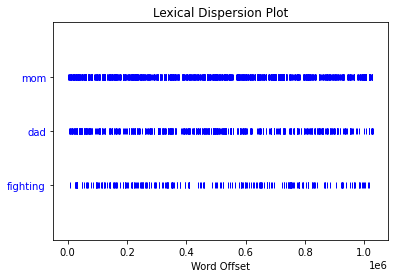

In [ ]:
disability_tokens.dispersion_plot(["mom", "dad", "fighting"]) #mom more often than dad

We can also work with time

In [ ]:
df['created_utc'] #this is "unix time"

0        1629505393
1        1629463903
2        1629455803
3        1629488445
4        1629568461
            ...    
14915    1432059588
14916    1432810374
14917    1432631216
14918    1433221478
14919    1433387839
Name: created_utc, Length: 14920, dtype: int64

Below we create a new variable by converting unix time into something more readable

In [ ]:
df.insert(loc=3, column='created_datetime', value=pd.to_datetime(df['created_utc'], unit='s'))
df.head(3)

,index,Unnamed: 0,id,created_datetime,created_utc,link_flair_text,author_flair_text,author,lemmas,over_18,title,is_self,selftext,score,upvote_ratio,distinguished,num_comments
0,0,0,p8hcfj,2021-08-21 00:23:13,1629505393,NaN,NaN,OrdanCoal,"like crying chronic_pain weak happy""if happy s...",False,Anybody noticed the trap people set with your ...,True,"Like, if I'm crying because I'm in chronic pai...",34,0.92,NaN,53
1,1,1,p84kgg,2021-08-20 12:51:43,1629463903,Rant,NaN,dusnood_,regular bills live relatives pay small things ...,False,"Feeling guilty for spending with ""disability i...",True,I don’t have any regular bills as I still live...,32,0.94,NaN,65
2,3,3,p82mfs,2021-08-20 10:36:43,1629455803,Discussion,NaN,ShenandoahValley,came manager local ssa office va spoke started...,False,Only 30% of SSD applicants approved on first try,True,This came from a manager at the local SSA offi...,14,0.90,NaN,81


We can select particular components of the timestamps by calling .year, .month,.day, etc. on the datetime column.

Thinking back to the flair column for this dataset, let's see if we can find out whether people are considered assholes more frequently in particular months. We'll first create a new df with just the submissions from 2021.

We take the variable and convert it to "date time index" then access all posts in a given year (example, 2021)

In [ ]:
df_2021 = df.loc[pd.DatetimeIndex(df['created_datetime']).year == 2021, :]
len(df_2021) #2778 posts in 2021

2778

In [ ]:
months_array = pd.DatetimeIndex(df_2021['created_datetime']).month_name()
months_array

Index(['August', 'August', 'August', 'August', 'August', 'August', 'August',
       'August', 'August', 'August',
       ...
       'March', 'March', 'March', 'March', 'March', 'March', 'March', 'March',
       'March', 'March'],
      dtype='object', name='created_datetime', length=2778)

plot

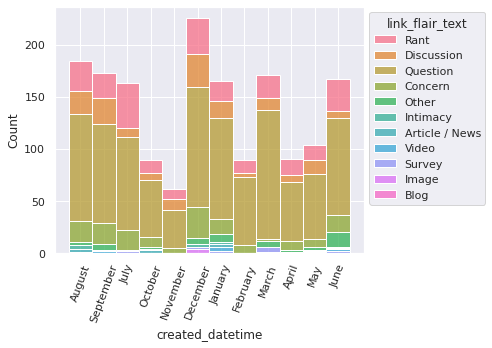

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.set(rc={'figure.figsize': (7, 5)})

p = sns.histplot(
    data=df_2021, 
    x=months_array,
    hue="link_flair_text",
    multiple="stack")

sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1))

plt.xticks(rotation=70)
plt.tight_layout()

We save our new variable (time created) into our existing dataset

In [ ]:
df.to_csv('disability_sub_top_sm_lemmas.csv', index=False)

In [ ]:
df.head()

,index,Unnamed: 0,id,created_datetime,created_utc,link_flair_text,author_flair_text,author,lemmas,over_18,title,is_self,selftext,score,upvote_ratio,distinguished,num_comments
0,0,0,p8hcfj,2021-08-21 00:23:13,1629505393,NaN,NaN,OrdanCoal,"like crying chronic_pain weak happy""if happy s...",False,Anybody noticed the trap people set with your ...,True,"Like, if I'm crying because I'm in chronic pai...",34,0.92,NaN,53
1,1,1,p84kgg,2021-08-20 12:51:43,1629463903,Rant,NaN,dusnood_,regular bills live relatives pay small things ...,False,"Feeling guilty for spending with ""disability i...",True,I don’t have any regular bills as I still live...,32,0.94,NaN,65
2,3,3,p82mfs,2021-08-20 10:36:43,1629455803,Discussion,NaN,ShenandoahValley,came manager local ssa office va spoke started...,False,Only 30% of SSD applicants approved on first try,True,This came from a manager at the local SSA offi...,14,0.90,NaN,81
3,4,4,p8cdd2,2021-08-20 19:40:45,1629488445,NaN,NaN,musicalearnightingal,coworkers hates workplaces politics having hat...,False,Have you ever called someone out for treating ...,True,So one of my coworkers really hates me. I get ...,12,0.93,NaN,20
4,5,5,p8w0cl,2021-08-21 17:54:21,1629568461,Rant,NaN,OracNimsaj,context 24f unknown form muscular_dystrophy wa...,False,What's the most ridiculous (or infuriating) th...,True,context: I (24F) have an unknown form of Muscu...,11,0.92,NaN,179


Here, we are changing the name of our dataset to "disability" instead of "df"

In [ ]:
disability = pd.read_csv('https://github.com/chrissoria/Disability_Reddit/raw/master/Data/disability_sub_top_sm_lemmas.csv')

In [ ]:
disability = disability.drop_duplicates(subset="selftext", keep='first', inplace=False)

In [ ]:
disability = disability.reset_index()

In [ ]:
disability.insert(loc=3, column='created_datetime', value=pd.to_datetime(disability['created_utc'], unit='s'))

In [ ]:
disability_cleaned.shape

(9744, 16)

How many posts per year?

In [ ]:
disability.head()

,level_0,index,Unnamed: 0,created_datetime,id,created_utc,link_flair_text,author_flair_text,author,lemmas,over_18,title,is_self,selftext,score,upvote_ratio,distinguished,num_comments
0,0,0,0,2021-08-21 00:23:13,p8hcfj,1629505393,NaN,NaN,OrdanCoal,"like crying chronic_pain weak happy""if happy s...",False,Anybody noticed the trap people set with your ...,True,"Like, if I'm crying because I'm in chronic pai...",34,0.92,NaN,53
1,1,1,1,2021-08-20 12:51:43,p84kgg,1629463903,Rant,NaN,dusnood_,regular bills live relatives pay small things ...,False,"Feeling guilty for spending with ""disability i...",True,I don’t have any regular bills as I still live...,32,0.94,NaN,65
2,2,3,3,2021-08-20 10:36:43,p82mfs,1629455803,Discussion,NaN,ShenandoahValley,came manager local ssa office va spoke started...,False,Only 30% of SSD applicants approved on first try,True,This came from a manager at the local SSA offi...,14,0.90,NaN,81
3,3,4,4,2021-08-20 19:40:45,p8cdd2,1629488445,NaN,NaN,musicalearnightingal,coworkers hates workplaces politics having hat...,False,Have you ever called someone out for treating ...,True,So one of my coworkers really hates me. I get ...,12,0.93,NaN,20
4,4,5,5,2021-08-21 17:54:21,p8w0cl,1629568461,Rant,NaN,OracNimsaj,context 24f unknown form muscular_dystrophy wa...,False,What's the most ridiculous (or infuriating) th...,True,context: I (24F) have an unknown form of Muscu...,11,0.92,NaN,179


In [ ]:
disability["created_datetime"]

0      2021-08-21 00:23:13
1      2021-08-20 12:51:43
2      2021-08-20 10:36:43
3      2021-08-20 19:40:45
4      2021-08-21 17:54:21
               ...        
9739   2015-05-19 18:19:48
9740   2015-05-28 10:52:54
9741   2015-05-26 09:06:56
9742   2015-06-02 05:04:38
9743   2015-06-04 03:17:19
Name: created_datetime, Length: 9744, dtype: datetime64[ns]

In [ ]:
disability["year"] = pd.DatetimeIndex(disability['created_datetime']).year
print(disability["year"])

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
9739    2015
9740    2015
9741    2015
9742    2015
9743    2015
Name: year, Length: 9744, dtype: int64


In [ ]:
disability["year"].value_counts().sort_index()

2014     203
2015     658
2016     886
2017     981
2018    1046
2019    1360
2020    1391
2021    1804
2022    1415
Name: year, dtype: int64

In [ ]:
from IPython.display import display

In [ ]:
display(disability["year"].value_counts().sort_index())

2014     203
2015     658
2016     886
2017     981
2018    1046
2019    1360
2020    1391
2021    1804
2022    1415
Name: year, dtype: int64

In [ ]:
disability[disability['score']>20]["year"].value_counts().sort_index() #view counts based on a condition

2014      1
2015     16
2016     26
2017     55
2018     68
2019    150
2020     19
2021     24
Name: year, dtype: int64

In [ ]:
df_year_flair = disability.groupby(["year","link_flair_text"]).size().reset_index() #view counts based on a categorical variable


In [ ]:
with pd.option_context('display.max_rows',100):
  display(df_year_flair)

,year,link_flair_text,0
0,2014,Blog,1
1,2014,Other,4
2,2014,Question,22
3,2014,Rant,4
4,2015,Announcement,2
5,2015,Article / News,4
6,2015,Blog,4
7,2015,Concern,23
8,2015,Image,1
9,2015,MOD POST,1


## Implementing TF-IDF
TF-IDF, short for **term frequency–inverse document frequency**, is a metric that reflects how important a word is to a **document** in a collection or **corpus**. When talking about text datasets, the dataset is called a corpus, and each datapoint is a document. A document can be a post, a paragraph, a webpage, whatever is considered the individual unit of text for a given datset. A **term** is each unique token in a document (we previously also referred to this as **type**). 

For example in a corpus of sentences, a document might be: `"I went to New York City in New York state."` 

The processed tokens in that document might be: `[went, new_york, city, new_york, state]`.

The document would have four unique terms: `[went, new_york, city, state]`.

The TF-IDF value increases proportionally to the number of times a word appears in the document (the term frequency, or TF), and is offset by the number of documents in the corpus that contain the word (the inverse document frequency, or IDF). This helps to adjust for the fact that some words appear more frequently in general – such as articles and prepositions.

We won't go into much detail about the math behind calculating the TF-IDF (see the D-Lab Text Analysis workshop videos to see more). The key components to remember are:

1. There is one TF-IDF score per unique term and unique document.
2. A high TF-IDF score suggests that term is descriptive of that document.
3. A low TF-IDF score may be because either the term is not frequent in that document, or that it is frequent in many documents in the dataset - either way, it may not be a good descriptor of that document.

The intuition is that if a word occurs many times in one post but rarely in the rest of the corpus, it is probably useful for characterizing that post; conversely, if a word occurs frequently in a post but also occurs frequently in the corpus, it is probably less characteristic of that post.



In [117]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
  'My cat has paws.',
  'Can we let the dog out?',
  'Our dog really likes the cat but the cat does not agree.']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
#pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
# Use this if your scikit-learn is older
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,agree,but,can,cat,does,dog,has,let,likes,my,not,our,out,paws,really,the,we
0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1
2,1,1,0,2,1,1,0,0,1,0,1,1,0,0,1,2,0


In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Settings that you use for count vectorizer will go here
tfidf_vectorizer = TfidfVectorizer(max_df=0.85,
                                   decode_error='ignore',
                                   stop_words='english',
                                   smooth_idf=True,
                                   use_idf=True)

# Fit and transform the texts
tfidf = tfidf_vectorizer.fit_transform(disability['lemmas'])

Below, we create a new dataset (replacing df) that contains all terms in the datasset and their frequency

In [119]:
df = pd.DataFrame(tfidf.todense(), columns=tfidf_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


below we can see the terms occoring most frequently in our dataset. Interestingly, "work" is in the top 4 (implying that work/being able to work is a major topic in our dataset).

In [121]:
df.sum().sort_values(ascending=False)

disability     271.544069
like           252.885835
people         228.515582
work           226.955323
know           225.224325
                  ...    
quickest         0.020293
subtypes         0.020293
ehavioral        0.020293
vistaril         0.020293
eprocessing      0.020293
Length: 32131, dtype: float64

Below we are creating a matrix of cosine simileriates (which compares all similarities to each other

In [122]:
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(tfidf)
similarities.shape

(9744, 9744)

or, we can compare just the first post to every other

In [123]:
similarities[0]

array([1.        , 0.04918632, 0.01617905, ..., 0.01561091, 0.02774659,
       0.018517  ])

We can create a similarity dataframe by identifying the post we want to compare (doc_idx) to the rest of the posts and assign them scores

In [124]:
doc_idx = 25
similar_df = pd.DataFrame({
    'text': disability['selftext'].values,
    'score': similarities[doc_idx]}).sort_values('score', ascending=False)

In [125]:
similar_df #there are no more duplicates here

,text,score
25,Posting for someone else. I know someone who h...,1.000000
4907,So I am trying to get on Disability due to my ...,0.269877
8890,"I have Bipolar, PTSD, ADHD and anxiety. I also...",0.217179
7872,I got in for a physical exam and psychological...,0.213823
3419,I have a relative in a legal + medical cannabi...,0.196115
...,...,...
6912,I'm paraplegic and am thinking about a 10 hour...,0.000000
2305,Me and a friend are planning to move to a new ...,0.000000
2303,"If so, what did you think of it? I am looking ...",0.000000
2302,How would you tell? Both could wear uniform,0.000000


In [126]:
similar_df_0 = pd.DataFrame({
    'text': disability['selftext'].values,
    'score': similarities[0]}).sort_values('score', ascending=False)
similar_df_0 #no more duplicates found

,text,score
0,"Like, if I'm crying because I'm in chronic pai...",1.000000
4994,I'm currently awaiting approval of disability ...,0.258638
3547,"Hi,\n\nMy mom has been living with a disabilit...",0.162526
3209,"I am mentally and physically disabled, but I w...",0.152943
9662,10 ways you can support the psychically disabl...,0.152149
...,...,...
7566,My husband is an HD/AK amputee beginning to bu...,0.000000
7565,I'm looking for suggestions for a reliable and...,0.000000
3271,I bought a Mac Book yesterday and realized it'...,0.000000
7552,About 2 years ago I was a 400 pound bilateral ...,0.000000


We introduce topic modeling. Topic modeling aims to use statistical models to discover abstract "topics" that occur in a collection of documents. It is frequently used in NLP to aid the discovery of hidden semantic structures in a collection of texts.

Before you start, please read the first three sections of [this post](https://tomvannuenen.medium.com/analyzing-reddit-communities-with-python-part-5-topic-modeling-a5b0d119add) for an explainer of how topic modeling (and LDA, which is just one form of topic modeling) works.

Specifically, we'll implement Latent Dirichlet Allocation (LDA), which is a classic method for topic modeling. Specifically, LDA is a "mixture model", meaning every document is assumed to be "about" various topics, and we try to estimate the proportion each topic contributes to a document.

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

max features using only the top 5000 TF-IDF values from our dataset (which is a large chunk of it).

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = disability['lemmas']
# Vectorize, using only the top 5000 TF-IDF values
vectorizer = TfidfVectorizer(max_features=5000)

tfidf =  vectorizer.fit_transform(X)

Computing 5 topics

In [133]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=2, max_iter=20, random_state=0)
lda = lda.fit(tfidf)

run a plot to display what the machine learning algo captured as the 5 distinct topics.

In [134]:
def plot_top_words(model, feature_names, n_top_words=10, n_row=1, n_col=5, normalize=False):
    """Plot the top words for an LDA model.
    
    Parameters
    ----------
    model : LatentDirichletAllocation object
        The trained LDA model.
    feature_names : list
        A list of strings containing the feature names.
    n_top_words : int
        The number of top words to show for each topic.
    n_row : int
        The number of rows to use in the subplots.
    n_col : int
        The number of columns to use in the subplots.
    normalize : bool
        If True, normalizes the topic model weights.
    """
    fig, axes = plt.subplots(n_row, n_col, figsize=(3 * n_col, 5 * n_row), sharex=True)
    axes = axes.flatten()
    components = model.components_
    if normalize:
        components = components / components.sum(axis=1)[:, np.newaxis]

    for topic_idx, topic in enumerate(components):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)

        for i in "top right left".split():
            ax.spines[i].set_visible(False)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)

    return fig, axes

display the plot. We can see here that we're getting a lot of 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


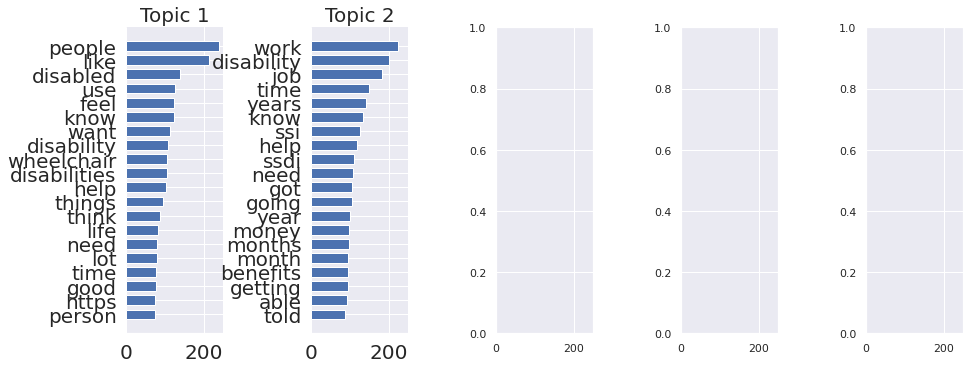

In [135]:
token_names = vectorizer.get_feature_names()
plot_top_words(lda, token_names, 20)
plt.show() # we can see here that there are a lot of lemmas that aren't useful (urls, reddit)

In [136]:
topic_distributions = lda.transform(tfidf)

In [137]:
print(tfidf.shape)
print(topic_distributions.shape)
print(topic_distributions)

(9744, 5000)
(9744, 2)
[[0.83372826 0.16627174]
 [0.41817218 0.58182782]
 [0.15571053 0.84428947]
 ...
 [0.79945682 0.20054318]
 [0.82040005 0.17959995]
 [0.47666348 0.52333652]]
